# Hangfeldolgozás

A feladatok elvégzésekor a jegyzőkönyvhöz csatolni kell a rögzített hangminta fájlokat. Ne felejtse el azokat feltölteni.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import scipy.signal as signal
import hanglab
import ipywidgets

## 1. feladat
**A hangkártya bemeneti karakterisztikájának meghatározása**

Állítsuk a hangkártya bemenetét `HDA: Intel PCH ALC233 Analog`-ra (**line in**), majd a jelgenerátor segítségével adjunk a bemenetre pár száz mV-os pár kHz-es szinuszhullámot! A bemeneti jelszintet és a generátor kimeneti amplitúdóját úgy válasszuk meg, hogy a hangkártya ne legyen túlvezérelve! Ezek után a generátor kimeneti amplitúdóját fixen hagyva mérjük meg a hangkártya által rögzített jel amplitúdóját legalább 15 különböző, megfelelően megválasztott frekvencián! Indokoljuk a frekvenciatartomány megválasztását! Ábrázoljuk az átviteli karakterisztikát Bode-diagramon a [`matplotlib.pyplot.plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) függvény segítségével!

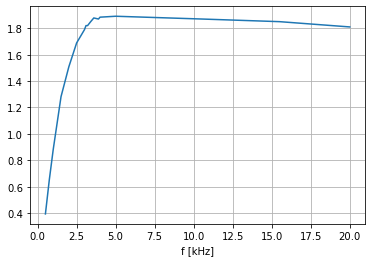

In [3]:
freq = [0.5,0.75,1,1.5,2,2.5,3,3.1,3.2,3.4,3.6,3.9,4.0,5,10.5,15.5,20]   # frekvenciák (khz)
amp = [0.394,0.653,0.882,1.282,1.508,1.689,1.789,1.82,1.82,1.85,1.878,1.870,1.884,1.891,1.87,1.85,1.81]    # mért amplitúdók
plot(freq, amp)
xlabel('f [kHz]')
grid()
# Ügyeljünk a tengelyfeliratokra!

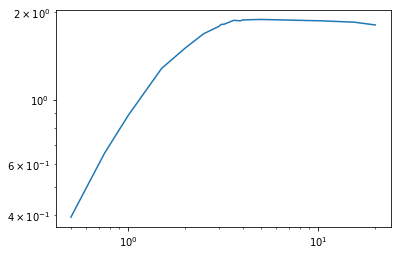

In [4]:
loglog(freq,amp)

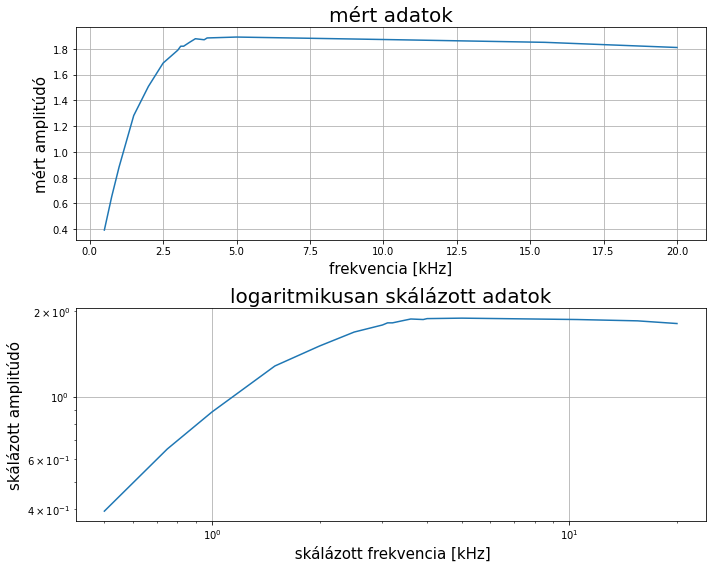

In [5]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))


axes[0].plot(freq, amp)
axes[0].set_title('mért adatok', size = 20)
axes[0].set_xlabel("frekvencia [kHz]", size = 15)
axes[0].set_ylabel("mért amplitúdó", size =15)
axes[0].grid()



axes[1].loglog(freq, amp)
axes[1].set_title('logaritmikusan skálázott adatok',size =20)
axes[1].set_xlabel(" skálázott frekvencia [kHz]", size = 15)
axes[1].set_ylabel("skálázott amplitúdó", size =15)
axes[1].grid()



plt.tight_layout()


Indoklás:

## 2. feladat
**Hangfájl rögzítése, manipulálása és visszajátszása**

Mikrofon segítségével (`Thinkcentre TIO24Gen3 for USB-a` hangcsatorna) rögzítsük az "Én (hallgató neve, vezetéknév + keresztnév) vagyok" mondatot! Mentsük el a fájlt "hang.wav" néven! Az alábbi rövid `python` program bemutatja, miként lehet egy `wav` fájlt beolvasni, ábrázolni, majd *lehalkítva* egy másik fájlba menteni. Játssza is vissza a lehalkított hangmintát!

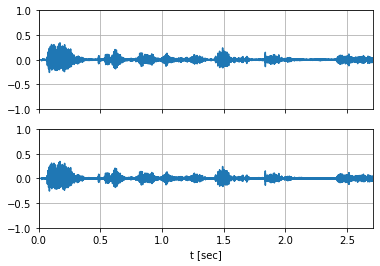

In [6]:
w = hanglab.readwave("név.wav")
hanglab.plotwave(w)

In [7]:
hanglab.writewave("2.feladat/halknév.wav", 0.1* w)
whalk = hanglab.readwave("2.feladat/halknév.wav")

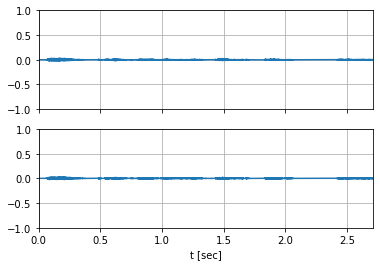

In [8]:
hanglab.plotwave(whalk)

Az előbbi példa alapján módosítsuk a felvett minta hangerejét úgy, hogy a legnagyobb csúcs értéke 1.0 legyen! Ezt a műveletet a hangerő normalizálásának nevezzük. Ábrázoljuk az eredményt és mentsük el `norm.wav` néven!

In [9]:
hanglab.writewave("2.feladat/norm.wav", w/max(abs(w[0,:])))
wnorm = hanglab.readwave("2.feladat/norm.wav")

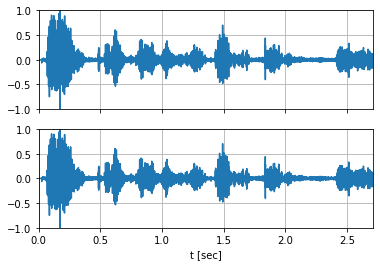

In [10]:
hanglab.plotwave(wnorm)

Készítsük el az eredeti hangfájl visszafelé játszott változatát. Mentsük el `vissza.wav` néven majd játsszuk is le!

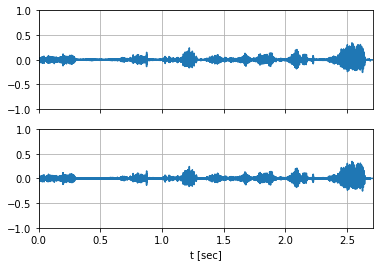

In [11]:
w = hanglab.readwave("név.wav")
length = len(w[0,:])
for i in range(length // 2):
    w[0,i], w[0,length - i - 1] = w[0,length - i - 1], w[0,i]
    w[1,i], w[1,length - i - 1] = w[1,length - i - 1], w[1,i]
    
vissza = w 
hanglab.writewave("2.feladat/vissza.wav",vissza)
hanglab.plotwave(w)

## 3. feladat

**Hangminta generálása**

Hangfájlt nem csak a hangkártya bemenetéről rögzíthetünk, hanem programból is generálhatunk. Az alábbi program egy 2 s-os, 1 kHz-es szinuszjelet állít elő, és ment fájlba. A programban szereplő `SAMPLE_RATE` változó a mintavételezési frekvenciát tárolja, a beállított értéke 44100.

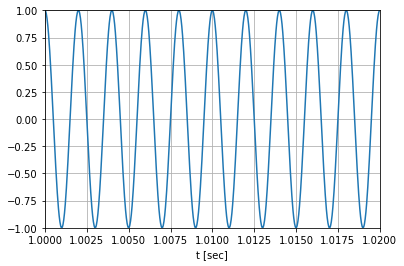

In [12]:
length = 2
f = 1000
t = linspace(0, length, length * hanglab.SAMPLE_RATE)
sinwave = cos(t * f * numpy.pi)
sinwave = reshape(sinwave, [1, t.size])  # a hangfájl mindig 2-dimenziós tömb!
hanglab.plotwave(sinwave, xlim=[1.0,1.02])
hanglab.writewave('sinus.wav', sinwave)

Módosítsuk a fenti programot úgy, hogy a generált szinuszhullám frekvenciája folyamatosan változzon 100 Hz és 5 kHz között! Mentsük el a generált hangot `chirp.wav` néven, majd játsszuk le!

Összetettebb hangminták generálásához használhatók a `scipy.signal` csomag következő függvényei:

* [`chirp`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html): időben változó frekvenciájú szinuszhullámot generál
* [`sawtooth`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html): fűrészfogjelet generál
* [`square`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html): négyszögjelet generál

A beépített függvények segítségével generáljunk ilyen típusú jeleket, és mentsük el `signal-TÍPUS.wav` néven. Ábrázoljuk is a jeleket a jegyzőkönyvben.

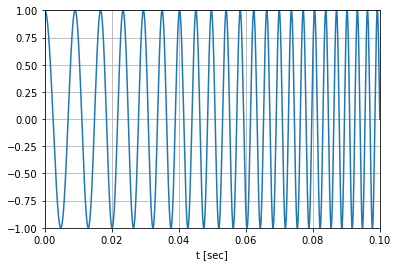

In [13]:
from scipy import signal
length = 2
t = linspace(0, length, length * hanglab.SAMPLE_RATE)
chirp_sig = signal.chirp(t, f0=100, f1=5000, t1=length, method='linear')
chirp_sig = reshape(chirp_sig, [1, t.size])
hanglab.plotwave(chirp_sig, xlim=[0,0.1])
hanglab.writewave('3.feladat/signal-chirp.wav', chirp_sig)

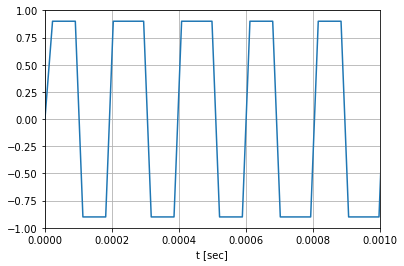

In [14]:
#csináltam manuálisan egyet, mert amikor a signal csomaggal generáltam és kimentettem nem hallatszódott semmi
def generate_square_wave(frequency, duration, sampling_rate, amplitude):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency * t))
    return t, square_wave

#parméterek
frequency = 5000 
duration = 2   
sampling_rate = 44100  
amplitude = 0.9 #ha 1-re állítom az amplitudót hibásan írja ki a hangifleba

#
time, square_wave = generate_square_wave(frequency, duration, sampling_rate,amplitude)
square_sig = reshape(square_wave, [1, t.size])
hanglab.plotwave(square_sig, xlim=[0,0.001])
hanglab.writewave('3.feladat/signal-square.wav', square_sig)

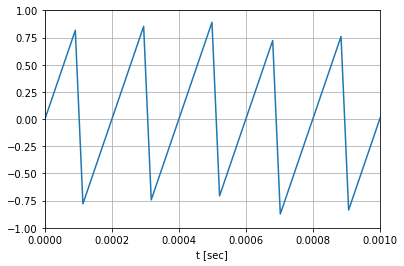

In [15]:
#itt szintén
def generate_sawtooth_wave(frequency, duration, sampling_rate, amplitude):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    sawtooth_wave = amplitude * (2 * (t * frequency - np.floor(0.5 + t * frequency)))
    return t, sawtooth_wave

#Paraméterek
frequency = 5000  
duration = 2   
sampling_rate = 44100  
amplitude = 0.9  
time, sawtooth_wave = generate_sawtooth_wave(frequency, duration, sampling_rate, amplitude)
saw_sig = reshape(sawtooth_wave, [1, t.size])
hanglab.plotwave(saw_sig, xlim=[0,0.001])
hanglab.writewave('3.feladat/signal-sawtooth.wav', saw_sig)


## 4. feladat

**Hangfájl újramintavételezése**

Lassítsuk le, illetve gyorsítsuk fel a korábban rögzített `hang.wav` fájt a laborvezető által adott mértékben, és mentsük el `lassu.wav`, illetve `gyors.wav` név alatt. Újramintavételezéshez használhatjuk a [`scipy.interp1d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) függvényt.

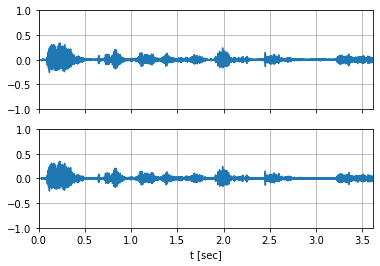

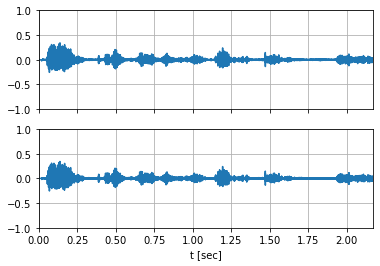

In [16]:
from scipy.interpolate import interp1d
input_wave = hanglab.readwave("név.wav")

#időtengely létrehozása
time_axis = np.arange(len(input_wave[0,:])) / 44100
#lassítás
slow_factor = 0.75
slow_interp = interp1d(time_axis, input_wave, kind='linear', fill_value="extrapolate")
slow_time_axis = np.arange(0, time_axis[-1], 1 / (44100 / slow_factor))
slow_wave = slow_interp(slow_time_axis)

#gyorsítás
fast_factor = 1.25
fast_interp = interp1d(time_axis, input_wave, kind='linear', fill_value="extrapolate")
fast_time_axis = np.arange(0, time_axis[-1], 1 / (44100 / fast_factor))
fast_wave = fast_interp(fast_time_axis)

hanglab.plotwave(slow_wave)
hanglab.plotwave(fast_wave)

hanglab.writewave('4.feladat/lassu.wav', slow_wave)
hanglab.writewave('4.feladat/gyors.wav', fast_wave)

## 5. feladat

**Gyors Fourier-transzformáció (FFT)**

A hangminta spektrumának meghatározásához (lévén a jel tisztán valós) a [`numpy.fft.rfft`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) függvényt használjuk. A spektrum ábrázolásához a `hanglab.plotspec`, a spektrogram felrajzolásához pedig a `hanglab.plotspecgram`, előre megírt függvények állnak rendelkezésre. Ábrázoljuk a korábban rögzített hangminta spektrumát és spektrogramját!

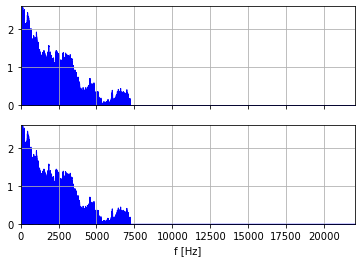

In [17]:
w = hanglab.readwave("név.wav")
wspeck = numpy.fft.rfft(w)
hanglab.plotspec(wspeck)

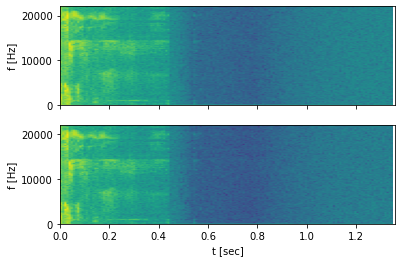

In [18]:
hanglab.plotspecgram(wspeck)

Az `numpy.fft.rfft` függvény természetesen komplex számokat ad vissza, ezt a spektrum számértékeinek kiíratásával ellenőrizhetjük. A fenti grafikonok generálásakor a spektrális együtthatók abszolút értékét jelenítettük meg. A [`numpy.fft.irfft`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.irfft.html) függvényt meghívva ellenőrizzük le, hogy az eredeti hangminta teljes egészében visszaállítható a spektrum alapján! Mentsük az eredményt `ifft.wav` néven!

In [19]:
wspeck

array([[-1.26531982+0.j        , -0.34855592-0.16371961j,
        -0.61889155-0.14019855j, ..., -0.02938106-0.03445625j,
        -0.01589815-0.0705948j , -0.00242589-0.01084149j],
       [-1.26507568+0.j        , -0.34870775-0.16455692j,
        -0.61853657-0.13898783j, ..., -0.01263103-0.04218479j,
         0.02688683-0.04178832j, -0.00850819-0.02397417j]])

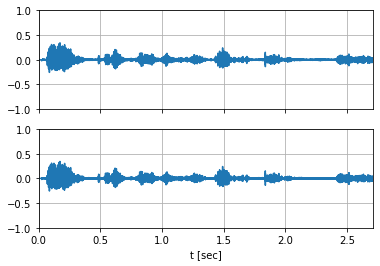

In [20]:
ifft = numpy.fft.irfft(wspeck)
hanglab.writewave('5.feladat/ifft.wav', ifft)
hanglab.plotwave(ifft)

## 6. feladat

**FFT-szűrő készítése**

Hozzunk létre egy átviteli függvényt, mely csak a 1000-3000 Hz közötti tartományban ereszt át. Hattassuk ezt az átviteli függvényt a `chirp.wav`, `signal.wav` és a `hang.wav` fájlok spektrumára, majd inverz-Fourier-transzformációval álítsuk vissza időfüggő jellé. Ábrázoljuk a sávlimitált jeleket és a spektrumukat. Mentsük el a hangmintákat `chirp_fft.wav`, `signal_fft.wav`, illetve `hang_fft.wav` néven! Halgassuk is meg az eredmény!

In [21]:
def transfer_function(frequencies, low_cutoff=1000, high_cutoff=3000):
    transfer = np.ones_like(frequencies)
    transfer[(frequencies < low_cutoff) | (frequencies > high_cutoff)] = 0
    return transfer

In [22]:
nev = hanglab.readwave("név.wav")
chirp = hanglab.readwave("3.feladat/signal-chirp.wav")
negyzet = hanglab.readwave("3.feladat/signal-square.wav")

fs = 44100

nev_spectrum = fft.rfft(nev)
chirp_spectrum = fft.rfft(chirp)
negyzet_spectrum = fft.rfft(negyzet)

frequencies_nev = fft.rfftfreq(len(nev[0,:]), 1/fs)
frequencies_chirp = fft.rfftfreq(len(chirp[0,:]), 1/fs) #vettem a spektrumok frekvenciáit, és ezeket adtam be mint paramétert a transfer functionbe
frequencies_negyzet = fft.rfftfreq(len(negyzet[0,:]), 1/fs)

nev_spectrum_filtered = nev_spectrum * transfer_function(frequencies_nev)
chirp_spectrum_filtered = chirp_spectrum * transfer_function(frequencies_chirp)
negyzet_spectrum_filtered = negyzet_spectrum * transfer_function(frequencies_negyzet)


nev_filtered = fft.irfft(nev_spectrum_filtered)
chirp_filtered = fft.irfft(chirp_spectrum_filtered)
negyzet_filtered = fft.irfft(negyzet_spectrum_filtered)




hanglab.writewave('6.feladat/nev-fft.wav', nev_filtered)
hanglab.writewave('6.feladat/chirp-fft.wav', chirp_filtered)
hanglab.writewave('6.feladat/negyzet-fft.wav', negyzet_filtered)

/v/courses/digilab.assignments/digilab-hangfeldolgozas/hanglab.py:90: RuntimeWarning: divide by zero encountered in log10
  sp = numpy.log10(numpy.abs(s))


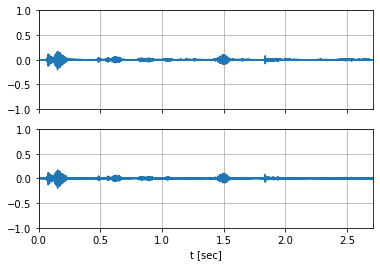

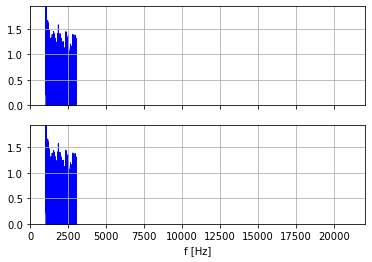

In [23]:
hanglab.plotwave(nev_filtered)
hanglab.plotspec(nev_spectrum_filtered)

/v/courses/digilab.assignments/digilab-hangfeldolgozas/hanglab.py:90: RuntimeWarning: divide by zero encountered in log10
  sp = numpy.log10(numpy.abs(s))


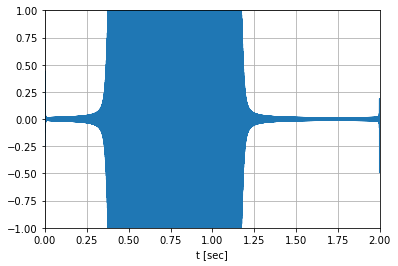

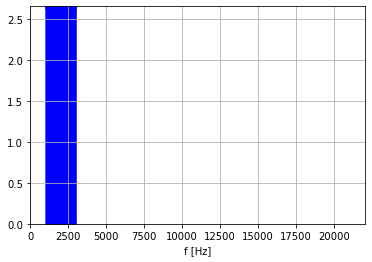

In [24]:
hanglab.plotwave(chirp_filtered)
hanglab.plotspec(chirp_spectrum_filtered)

/v/courses/digilab.assignments/digilab-hangfeldolgozas/hanglab.py:90: RuntimeWarning: divide by zero encountered in log10
  sp = numpy.log10(numpy.abs(s))


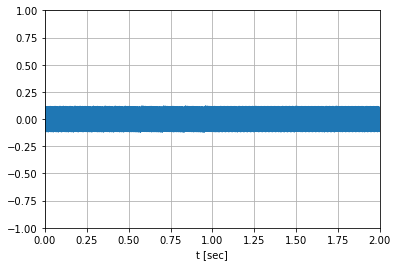

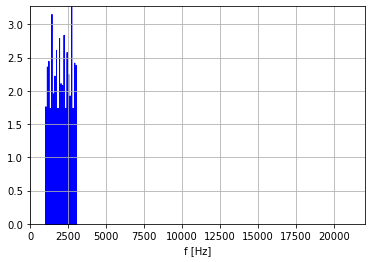

In [25]:
hanglab.plotwave(negyzet_filtered)
hanglab.plotspec(negyzet_spectrum_filtered)

**Spektrum átskálázása**

Korábban tapasztaltuk, hogy a felgyorsított hangminta nem csak rövidebb ideig tart, de ugyanakkor a hangmagasság is megemelkedik. A hangmagasság a hangminta felgyorsítása nélkül is megemelhető a spektrum megfelelő átskálázásával. Írjon egy rövid `python` scriptet, mely úgy transzformálja a spektrumot, hogy minden hang egy oktávval magasabban hangozzék!

## 7. feladat

**Késleltetés (delay) megvalósítása FIR-szűrővel**

Az alábbi program egy olyan FIR szűrőt definiál, mely 0,2 s-mal késlelteti a bemenő jelet. A FIR-szűrőt a [`scipy.signal.lfilter`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) függvénnyel hattatjuk a jelre. FIR-szűrő esetén a függvény `fa` paramétere konstans 1.0.

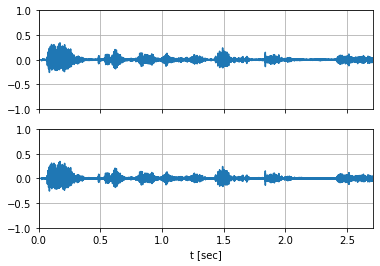

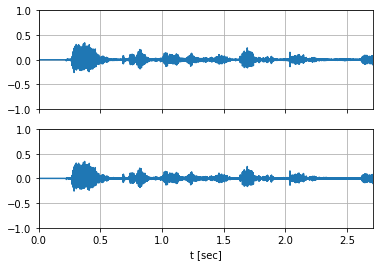

In [26]:
w = hanglab.readwave("név.wav")
d = int(np.round(0.2 * hanglab.SAMPLE_RATE))
fb = numpy.zeros(d)
fb[-1] = 1
w2 = signal.lfilter(fb, 1.0, w)
hanglab.plotwave(w)
hanglab.plotwave(w2)

Módosítsuk a fenti FIR-szűrőt oly módon, hogy az egyszerű visszhangosítóként működjön, azaz az eredeti jel mellett jelenjen meg a jel eltoltja, az eredeti amplitúdónál valamivel kisebb amplitúdóval (hiszen a visszhang mindig halkabb az eredeti hangnál). Alkalmazzuk a szűrőt a `hang.wav` fájlra, és mentsük el `delay.wav` néven! A FIR-szűrővel megvalósított visszhang nagyon egyszerű, a hang csupán egyszer *verődik vissza*, azaz nem *pattog* a képzeletbeli szoba falai között, mint a valódi visszhang.

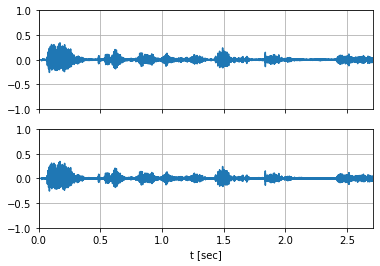

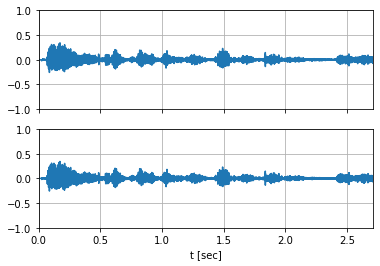

In [27]:
from scipy.signal import lfilter


def create_delay_filter(delay, sample_rate):
    d = int(np.round(delay * hanglab.SAMPLE_RATE))
    filter_coefficients = np.zeros(d)
    filter_coefficients[-1] = 0.4  #A visszhang kisebb amlitudóval jelenik meg
    filter_coefficients[0] = 1.0  #Az eredeti jel változatlanul
    return filter_coefficients

def apply_delay_filter(input_wave, filter_coefficients):
    output_wave = lfilter(filter_coefficients, 1.0, input_wave)
    return output_wave


w = hanglab.readwave("név.wav")


delay = 0.2  
delay_filter = create_delay_filter(delay, hanglab.SAMPLE_RATE)
w2 = apply_delay_filter(w, delay_filter)



hanglab.plotwave(w)
hanglab.plotwave(w2)


In [28]:
hanglab.writewave('7.feladat/delay.wav', w2)

## 8. feladat

**Visszhangosítás (echo) IIR-szűrővel**

Az előbbi FIR-szűrő mindig csak az eredeti jelből vett mintákat keveri hozzá a kimenethez, a kimenetet magát sosem használja fel. Az IIR-szűrők segítségével olyan digitális szűrők is megvalósíthatók, melyek a kimenet korábbi értékeit is figyelembe veszik. Tervezzünk olyan IIR-szűrőt, mely valósághű visszhangosítót valósít meg, azaz képes a többszörös visszaverődés szimulációjára is. A konvolúcióhoz ismét használjuk a [`scipy.signal.lfilter`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) függvény, ám most az `fa` paraméter értéke egy vektor legyen, melynek 0. eleme kötelezően 1. Futassuk le a programot a `hang.wav` fájlon, és az eredményt mentsük el `echo.wav` néven!

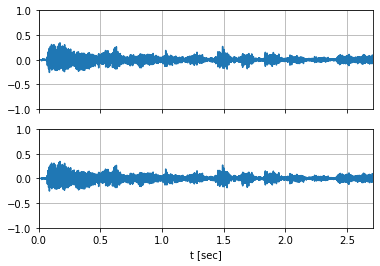

In [29]:
def create_echo_filter(delay, decay, sample_rate):
    d = int(np.round(delay * sample_rate))
    echo_filter = np.zeros(d)
    echo_filter[0] = 1.0
    echo_filter[-1] = 0.6  
    return echo_filter


w = hanglab.readwave("név.wav")


delay = 0.2  
echo_filter = create_echo_filter(delay, 0.6, hanglab.SAMPLE_RATE)

# Visszhang alkalmazása
w_echo = lfilter([1.0], echo_filter, w)

hanglab.plotwave(w_echo)
hanglab.writewave('8.feladat/echo.wav', w_echo)

## 9. feladat

**Frekvenciaszűrő megvalósítása IIR szűrővel**

IIR szűrők segítségével spektrális szűrés is elvégezhető, anélkül, hogy elő kellene állítani a jel Fourier-transzformáltját. A [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html) csomag segítségével sokfajta szűrő előállítható. Többek között az alábbi függvények állnak rendelkezésre:

* [`scipy.signal.butter`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) Butterworth-szűrőt készít
* [`scipy.signal.cheby1`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html) I. típusú Csebisev-szűrőt készít
* [`scipy.signal.cheby2`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html) II. típusú Csebisev-szűrőt készít
* [`scipy.signal.bessel`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html) Bessel-szűrőt készít
* [`scipy.signal.ellip`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html) Elliptikus szűrőt készít

Készítsünk el egy laborvezető által megadott paraméterezésű szűrőt! Ábrázoljuk az impulzusválaszt, illetve hattassuk a szűrőt a `hang.wav`, `signal.wav` valamint a `chirp.wav` fájlokra! Mentsük el az eredményeket `hang_iir.wav`, `signal_iir.wav` és `chirp_iir.wav` néven. Ügyeljünk arra, hogy a szűrőket készítő függvények a frekvenciákat Nyquist-frekvencia egységekben várják! Elemezzük a tapasztalatokat!

Tapasztalataim: *[tapasztalatok]*

Ábrázolja az átviteli függvényt a frekvencia függvényében! Az átviteli függvény meghatározásához használható a [`scipy.signal.freqs`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs.html) függvény, mely a körfrekvencia függvényében adja meg a szűrő csillapítását.

## 10. feladat

**Hangfelismerés**

A feladat, hogy a korábban rögzített `hang.wav` fájlban azonosítsuk az elhangzó keresztnevet. A következőképpen járunk el: Rögzítsünk egy új hangfájlt, amelyben csak a keresztnév szerepel! (Ne a korábban felvett fájlt szerkesszük át, hanem vegyük fel újra mikrofon segítségével!) Ügyeljünk arra, hogy a fájl elején és végén ne legyen szünet! Mentsük a fájlt `nev.wav` néven, majd töltsük be a jegyzőkönyvbe! Az elhangzó név azonosítását a két jel spektrogramjának keresztkorreláltatásával végezzük el. Ehhez előbb generáljuk le a spektrogramokat a `pylab.specgram` függvénnyel, majd korreláltassuk őket a [`scipy.signal.correlate`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html), illetve [`scipy.signal.correlate2d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html) függvényével! Ábrázoljuk és értelmezzük az eredményeket! Próbáljuk ki, hogy működik-e a módszer akkor, ha keresztnevünket egyik évfolyamtársunk mondja!

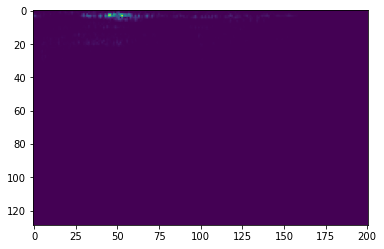

In [30]:
w = hanglab.readwave("keresztnév.wav")
spgr1, freqs1, bins1, im = specgram(w[0])   # csak az egyik csatorna
imshow(spgr1)

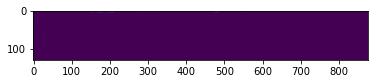

In [31]:
w2 = hanglab.readwave("tisztanév2.wav")
spgr2, freqs2, bins2, im2 = specgram(w2[0])
w3 = hanglab.readwave("tisztanév3.wav")
spgr3, freqs3, bins3, im3 = specgram(w3[0])
w4 = hanglab.readwave("tisztanév4.wav")
spgr4, freqs4, bins4, im4 = specgram(w4[0])
w5 = hanglab.readwave("tisztanév5.wav")
spgr5, freqs5, bins5, im5 = specgram(w5[0])

spgr2, freqs2, bins2, im2 = specgram(w2[0])   # csak az egyik csatorna
imshow(spgr2)

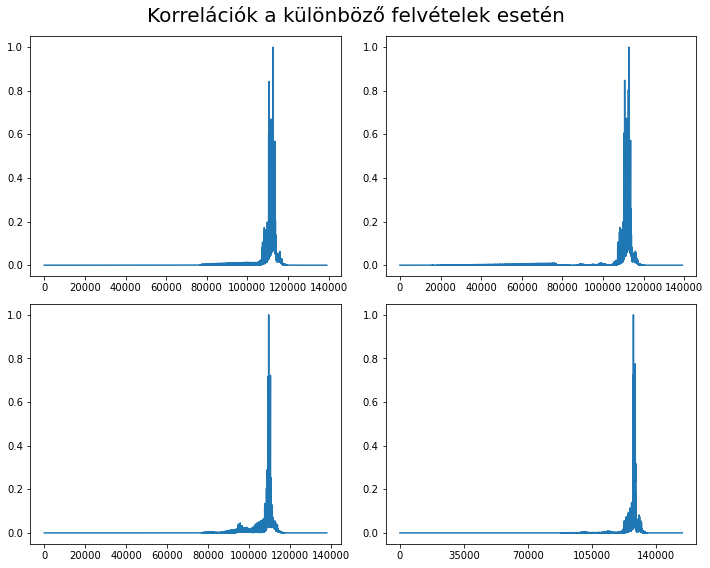

In [32]:
x1=scipy.signal.correlate(spgr1.flatten(),spgr2.flatten(), mode = "full")
x1_normalized = x1 / np.max(np.abs(x1))

x2=scipy.signal.correlate(spgr1.flatten(),spgr3.flatten(), mode = "full")
x2_normalized = x2 / np.max(np.abs(x2))

x3=scipy.signal.correlate(spgr1.flatten(),spgr4.flatten(), mode = "full")
x3_normalized = x3 / np.max(np.abs(x3))

x4=scipy.signal.correlate(spgr1.flatten(),spgr5.flatten(), mode = "full")
x4_normalized = x4 / np.max(np.abs(x4))

figure(figsize=(10,8))
suptitle("Korrelációk a különböző felvételek esetén", size = 20)
plt.subplot(2, 2, 1)
plot(x1_normalized)

plt.subplot(2, 2, 2)
plot(x2_normalized)

plt.subplot(2, 2, 3)
plot(x3_normalized)


plt.subplot(2, 2, 4)
plot(x4_normalized)

xticks(np.linspace(0, 140000, 5))
tight_layout()


In [33]:
len(numpy.linspace(0, w2.shape[1], w2.shape[1]) / 44100) +len(w[0]) #ezt valahogy időre konvertálni

138389

A 2D-s konvolúciót nem sikerült működésre birnom, hosszú percekig futtattam, és csak meghalt tőle a kernel

Tapasztalataim: *[tapasztalatok]*